<a href="https://colab.research.google.com/github/59822/Naives-Bayes/blob/main/Naives_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
dt = pd.read_csv('/content/Restaurant_Reviews.csv', delimiter='\t')
dt.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [44]:
print(dt.columns)

Index(['Review', 'Liked'], dtype='object')


In [45]:
dt.shape

(1000, 2)

In [46]:
corpus = [] #So important for NL
for i in range(0,1000): # Strings only
    review = re.sub('[^a-zA-Z]', ' ', dt['Review'][i]) #
    review = review.lower()
    review = review.split()
    porter = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    # Todo: Not is important for recognize feelings, so can't be in stopwords
    review = [porter.stem(word) for word in review if not word in set(all_stopwords)]
    #Elimmina sufijos
    review = ' '.join(review)
    corpus.append(review)

In [49]:
vectorizer = CountVectorizer(max_features=1600)
X = vectorizer.fit_transform(corpus).toarray()
y = dt.iloc[:, -1].values

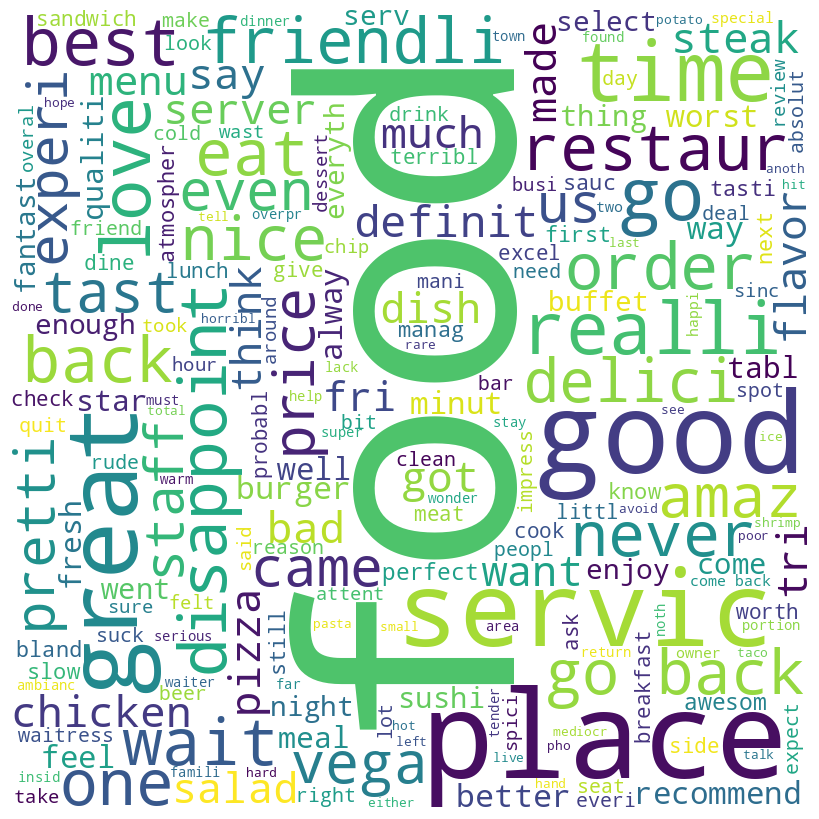

In [53]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combinar todas las reseñas en un solo texto
#Este va a combinar todas las reseñas, que se presetnarn en WordCloud
all_reviews = " ".join(corpus)

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(all_reviews)

# Mostrar la nube de palabras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<Axes: title={'center': 'Top 10 Words!'}, xlabel='Word', ylabel='Frequency'>

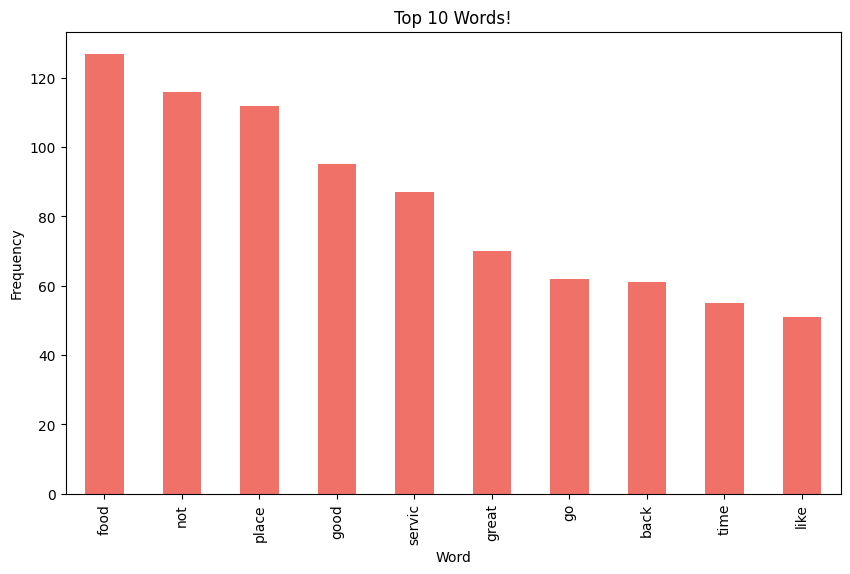

In [81]:
#Bar pot
from collections import Counter

w_frequency = Counter()


for review in corpus:
  word = review.split()
  w_frequency.update(word)
  tabla = pd.Series(data=w_frequency, index=w_frequency.keys())

top_ten = tabla.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.title('Top 10 Words!')
plt.xlabel('Word')
plt.ylabel('Frequency')
#plt.bar(top_ten.index, top_ten.values)
colore = '#f07167'
top_ten.plot(kind='bar', color=colore)

In [57]:
# Printear las malas reseñas

bad_review = [corpus[i] for i in range(len(corpus)) if y[i] == 0]
corpus_negative = " ".join(bad_review)

<Axes: title={'center': 'Top 10 Words for a bad Review!'}, xlabel='Word', ylabel='Frequency'>

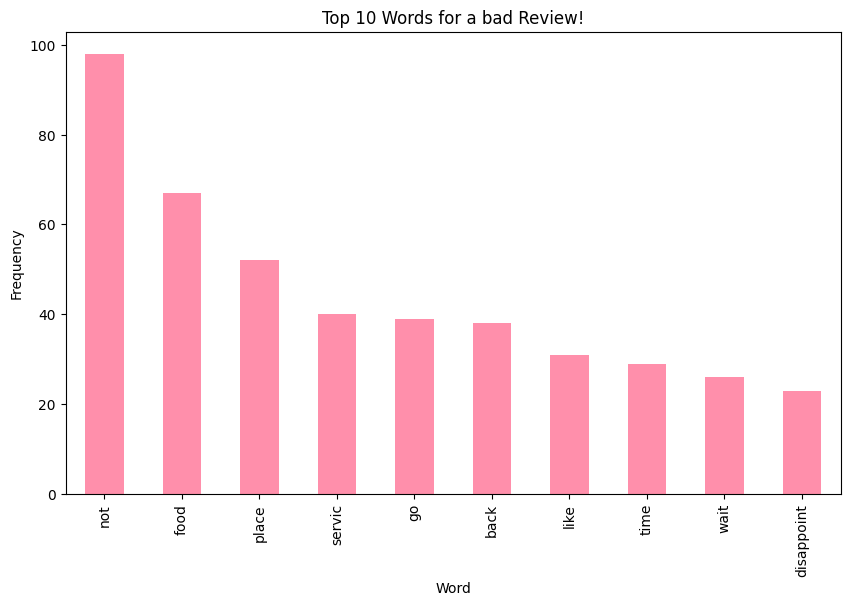

In [78]:
w_frequency = Counter()


for review in bad_review:
  word = review.split()
  w_frequency.update(word)
  tabla = pd.Series(data=w_frequency, index=w_frequency.keys())

top_ten = tabla.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.title('Top 10 Words for a bad Review!')
plt.xlabel('Word')
plt.ylabel('Frequency')
top_ten.plot(kind='bar', color ='#ff8fab')

**Negative reviews are showed**

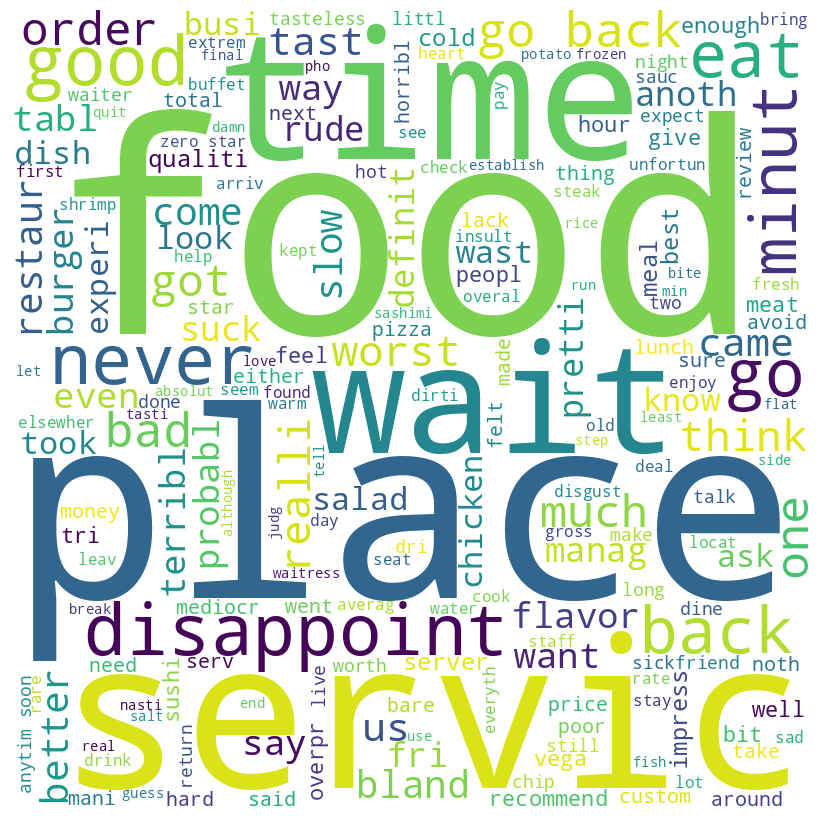

In [58]:
wordcloud_bad = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(corpus_negative)

# Mostrar la nube de palabras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_bad)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#Positive


In [62]:
# Printear las buenas reseñas

good_review = [corpus[i] for i in range(len(corpus)) if y[i] == 1]
corpus_positive = " ".join(good_review)

<Axes: title={'center': 'Top 10 Words for good Review!'}, xlabel='Word', ylabel='Frequency'>

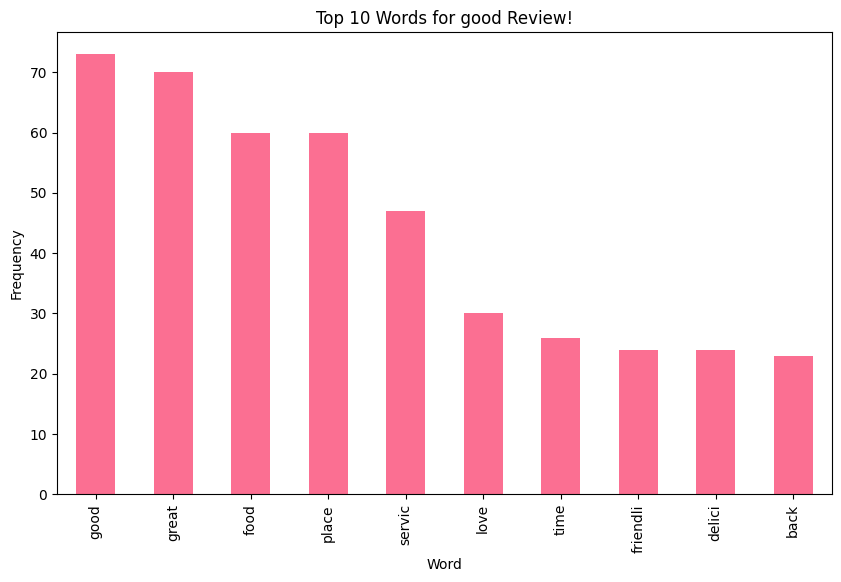

In [80]:
#Bar pot
from collections import Counter

w_frequency = Counter()


for review in good_review:
  word = review.split()
  w_frequency.update(word)
  tabla = pd.Series(data=w_frequency, index=w_frequency.keys())

top_ten_good = tabla.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.title('Top 10 Words for good Review!')
plt.xlabel('Word')
plt.ylabel('Frequency')
#plt.bar(top_ten.index, top_ten.values)
colore = '#fb6f92'
top_ten_good.plot(kind='bar', color=colore)

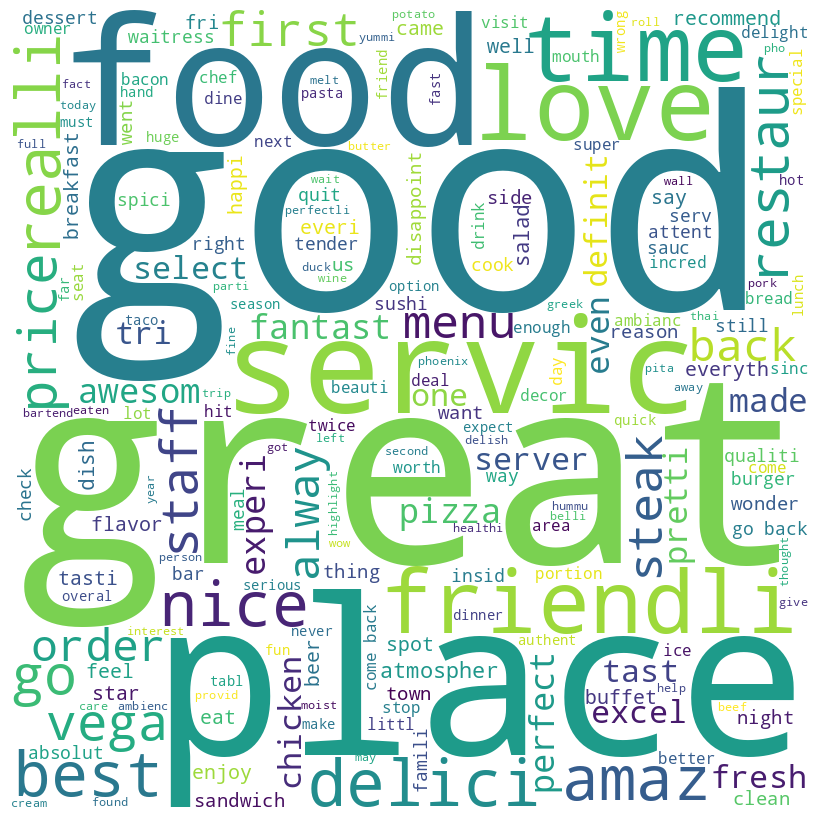

In [63]:
wordcloud_good = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(corpus_positive)

# Mostrar la nube de palabras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_good)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)

Aquí vamos a usar MB porque tenemos un clasificador de textos


In [51]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [52]:
y_pred = classifier.predict(X_test)

In [87]:
# Crear la matriz de confusion: Donde se evalua Verdadero positivo, Falso Positivo, Verdadero Negativa y Falso Negativo
'''Verdadero positivo: Se predijo correctamente la instancia positiva
Falso Positivo: Se Predijo mal la instnacia positiva
Verdadero Negativo: Se predijo correctamente la instancia negativa
Falso Negativo: Se predijo mal la instancia negativa'''
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[121  31]
 [ 35 113]]


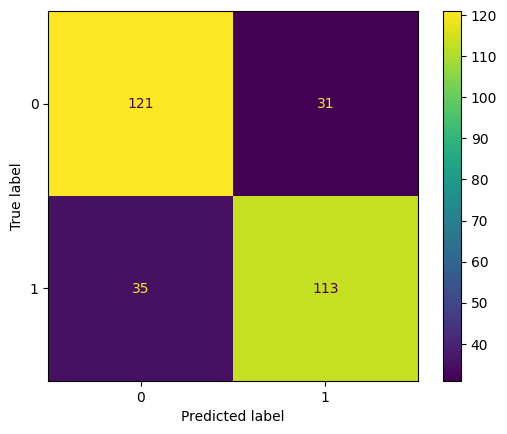

In [90]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
#A11 VP
#A12 FP
#A21 FN
#A22 FP

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred) #Accurancy dice que tanto esta el modelo prediciendo bien
precision = precision_score(y_test, y_pred) # Como el modelo predice una positiva
recall = recall_score(y_test, y_pred) # Cuantas realmente son positivas
f1 = f1_score(y_test, y_pred) #Balance

In [98]:
print("Accuracy:", accuracy*100, "%")
print("Precision:", round(precision*100,2), "%")
print("Recall:", round(recall*100,2), "%")
print("F1 Score:", round(f1*100,2), "%")

Accuracy: 78.0 %
Precision: 78.47 %
Recall: 76.35 %
F1 Score: 77.4 %


Calculo P(clase=0|datos)
Calculo P(clase=1|datos)

In [109]:
#Positivo
total = len(y_train)
negative = len(y_train) - y_train.sum()
positivo = y_train.sum()
print("El total de positivos es {}\nEl total de negativos es{}\nEl total de data {}".format(positivo,negative,total))
p_positivo = y_train.sum() / len(y_train)
print("Probabilidad de positivos {}%".format((p_positivo*100)))

p_negativo = 1 - p_positivo
print("Probabilida de negativos",p_negativo*100, "%")

El total de positivos es 352
El total de negativos es348
El total de data 700
Probabilidad de positivos 50.28571428571429%
Probabilida de negativos 49.71428571428571 %


In [137]:
print(len(y_train))

700


**User interactive**

In [129]:
class RestauranteReviewProbability:
    def __init__(self, X_train, y_train, vectorizer):
        self.X_train = X_train
        self.y_train = y_train
        self.vectorizer = vectorizer

    def calcular_probability(self, word):
        word = re.sub('[^a-zA-Z]', ' ', word)
        word = word.lower()
        porter = PorterStemmer()
        word = porter.stem(word)

        try:
            word_index = self.vectorizer.vocabulary_[word]
        except KeyError:
            return "Word not in vocabulary"

        # Get indices of positive and negative reviews
        pos_indices = np.where(self.y_train == 1)[0]
        neg_indices = np.where(self.y_train == 0)[0]

        # Calculate total word counts for positive and negative reviews
        total_pos = self.X_train[pos_indices].sum() # Fixed line
        total_neg = self.X_train[neg_indices].sum() # Fixed line

        freq_pos = self.X_train[self.y_train == 1, word_index].sum()
        freq_neg = self.X_train[self.y_train == 0, word_index].sum()

        # Laplace smoothing
        p_word_given_pos = (freq_pos + 1) / (total_pos + len(self.vectorizer.vocabulary_))
        p_word_given_neg = (freq_neg + 1) / (total_neg + len(self.vectorizer.vocabulary_))

        p_word_total = (freq_pos + freq_neg) / (total_pos + total_neg)

        return {
            "mensaje": "La probabilidad de la palabra {} en las reseñas: ".format(word),
            "p_word_given_pos": p_word_given_pos,
            "p_word_given_neg": p_word_given_neg,
            "p_word_total": p_word_total
        }

In [132]:
restaurant_prob = RestauranteReviewProbability(X_train, y_train, vectorizer)

# Word:
wordo = input("Ingrese la palabra: ")

resultados = restaurant_prob.calcular_probability(wordo)

# Check if the function returned a string
if isinstance(resultados, str):
    print(resultados)  # Print the error message
else:
    # Mostrar el resultado
    print(resultados["mensaje"])
    print("P(palabra | Reseña Positiva):", resultados["p_word_given_pos"])
    print("P(palabra | Reseña Negativa):", resultados["p_word_given_neg"])
    print("P(palabra | Total):", resultados["p_word_total"]*100)

Ingrese la palabra: food
La probabilidad de la palabra food en las reseñas: 
P(palabra | Reseña Positiva): 0.012275192691978304
P(palabra | Reseña Negativa): 0.013781697905181918
P(palabra | Total): 2.2755688922230557
